RadioButtons(description='Steps:', index=3, options=('Step 1: Depot', 'Step 2: First 5 Customers', 'Step 3: Al…

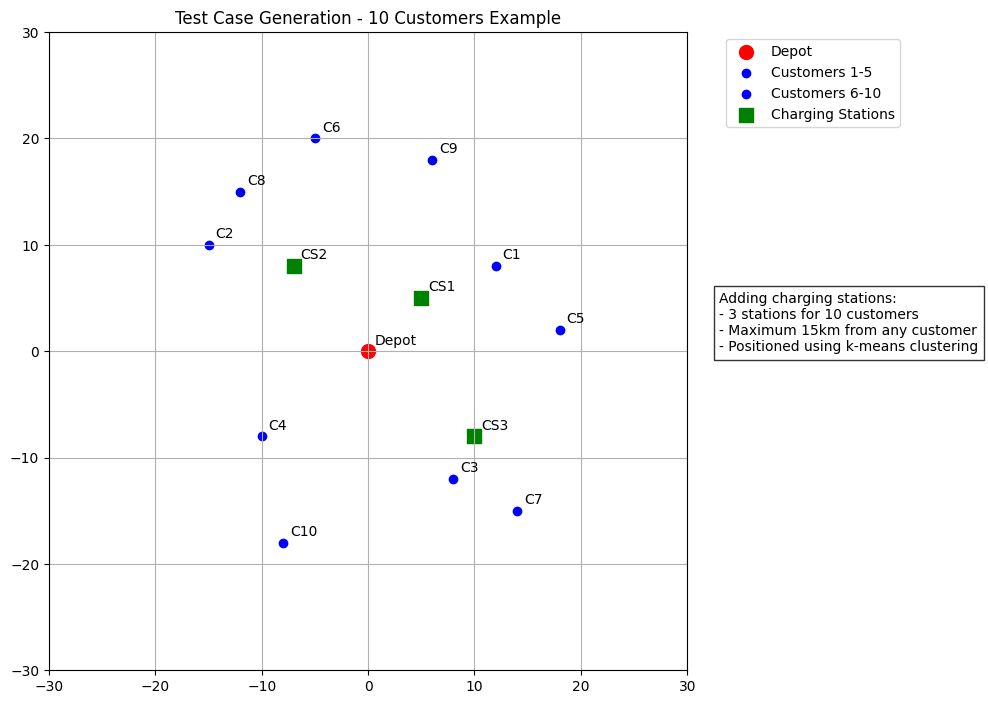

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import ipywidgets as widgets

class TestCaseVisualizer:
    def __init__(self):
        # Example data for 10 customers
        self.depot = np.array([[0, 0]])
        self.customers = np.array([
            [12, 8], [-15, 10], [8, -12], [-10, -8], [18, 2],
            [-5, 20], [14, -15], [-12, 15], [6, 18], [-8, -18]
        ])
        self.charging_stations = np.array([
            [5, 5], [-7, 8], [10, -8]
        ])
        
        # Create buttons
        self.buttons = widgets.RadioButtons(
            options=['Step 1: Depot', 
                    'Step 2: First 5 Customers',
                    'Step 3: All Customers',
                    'Step 4: Add Charging Stations'],
            description='Steps:',
            disabled=False
        )
        
        # Initial setup
        self.step = 1
        self.fig = None
        self.ax = None
        
        # Bind button click event
        self.buttons.observe(self.on_button_clicked, names='value')
        
        # Display buttons and initial plot
        display(self.buttons)
        self.create_plot()
        
    def create_plot(self):
        """Create new plot with current step"""
        plt.close('all')  # Close any existing plots
        self.fig, self.ax = plt.subplots(figsize=(10, 10))  # Square figure
        self.update_plot()
        plt.show()
        
    def update_plot(self):
        """Update existing plot"""
        self.ax.clear()
        
        # Set up the plot
        self.ax.set_xlim(-30, 30)
        self.ax.set_ylim(-30, 30)
        self.ax.grid(True)
        self.ax.set_aspect('equal')  # Make plot square
        
        # Plot based on current step
        if self.step >= 1:  # Depot
            self.ax.scatter(self.depot[:, 0], self.depot[:, 1], 
                          color='red', s=100, label='Depot')
            # Add depot label
            self.ax.annotate('Depot', (self.depot[0, 0], self.depot[0, 1]), 
                           xytext=(5, 5), textcoords='offset points')
            
        if self.step >= 2:  # First 5 customers
            self.ax.scatter(self.customers[:5, 0], self.customers[:5, 1], 
                          color='blue', label='Customers 1-5')
            # Add customer labels 1-5
            for i in range(5):
                self.ax.annotate(f'C{i+1}', (self.customers[i, 0], self.customers[i, 1]),
                               xytext=(5, 5), textcoords='offset points')
            
        if self.step >= 3:  # All customers
            self.ax.scatter(self.customers[5:, 0], self.customers[5:, 1], 
                          color='blue', label='Customers 6-10')
            # Add customer labels 6-10
            for i in range(5, 10):
                self.ax.annotate(f'C{i+1}', (self.customers[i, 0], self.customers[i, 1]),
                               xytext=(5, 5), textcoords='offset points')
            
        if self.step >= 4:  # Charging stations
            self.ax.scatter(self.charging_stations[:, 0], self.charging_stations[:, 1], 
                          color='green', marker='s', s=100, label='Charging Stations')
            # Add charging station labels
            for i in range(len(self.charging_stations)):
                self.ax.annotate(f'CS{i+1}', (self.charging_stations[i, 0], self.charging_stations[i, 1]),
                               xytext=(5, 5), textcoords='offset points')
        
        self.ax.set_title('Test Case Generation - 10 Customers Example')
        self.ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add step details
        details = {
            1: "Starting with depot at origin (0,0).\nThis is the reference point for all distances.",
            2: "Adding first 5 customers.\nEach customer must be:\n- Minimum 2km from other customers\n- Maximum 30km from depot",
            3: "Completing customer placement.\nTotal 10 customers placed following distance constraints.",
            4: "Adding charging stations:\n- 3 stations for 10 customers\n- Maximum 15km from any customer\n- Positioned using k-means clustering"
        }
        self.ax.text(1.05, 0.5, details[self.step], 
                    transform=self.ax.transAxes, 
                    bbox=dict(facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        
    def on_button_clicked(self, change):
        """Handle button clicks"""
        self.step = int(change.new[5])  # Extract step number from button label
        clear_output(wait=True)
        display(self.buttons)
        self.create_plot()

# Create and display the visualizer
visualizer = TestCaseVisualizer()